In [20]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

from threadpoolctl import threadpool_limits
threadpool_limits(limits=1)



# **Required libraries**

In [21]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# **Loading Dataset**

In [22]:
iris=load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target']=iris.target
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


# **Actual Pairplot**

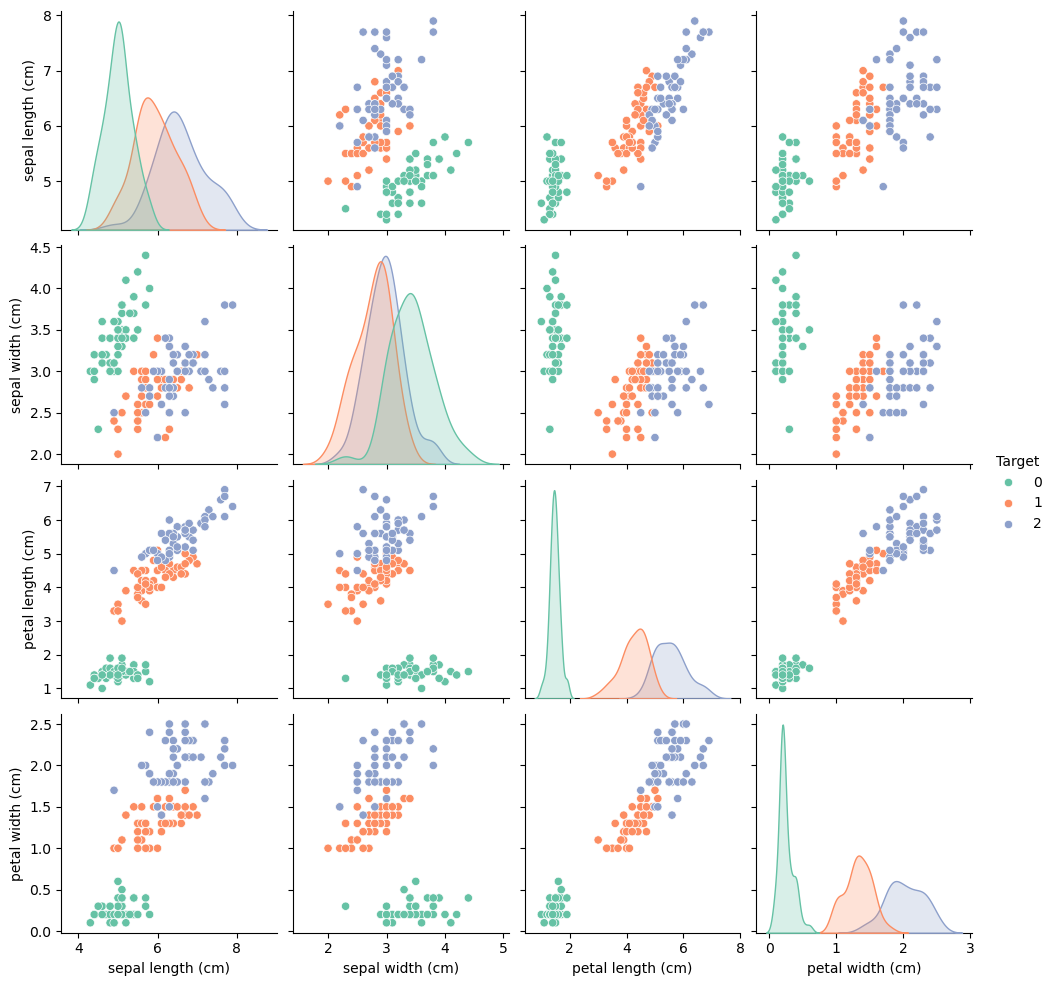

In [23]:
sns.pairplot(data=df, hue='Target', palette='Set2')
plt.show()

# **Finding Best Clusters**

In [24]:
X=df.drop('Target', axis=1)
clusters=[]
for i in range(2,21):
    k=KMeans(n_clusters=i, init='k-means++')
    k.fit(X)
    clusters.append(k.inertia_)
    

# **Elbow Method for Optimal Cluster Selection**

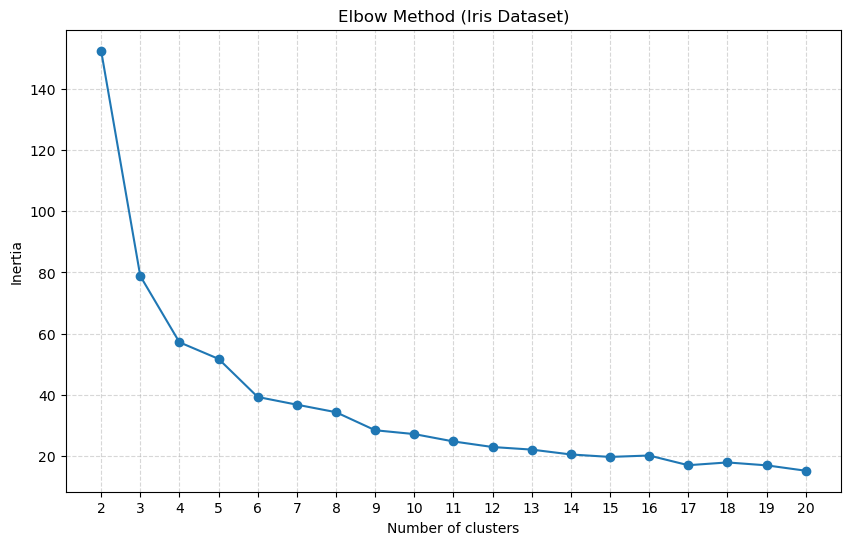

In [55]:
plt.figure(figsize=(10,6))
plt.plot([i for i in range(2,21)], clusters, marker='o')
plt.grid(True, alpha=0.5, linestyle='--')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method (Iris Dataset)")
plt.xticks([i for i in range(2,21)])
plt.savefig('Elbow Method.png', dpi=300)
plt.show()

# **KMeans**

In [46]:
model=KMeans(n_clusters=3, random_state=42)
df['Labels']=model.fit_predict(X)

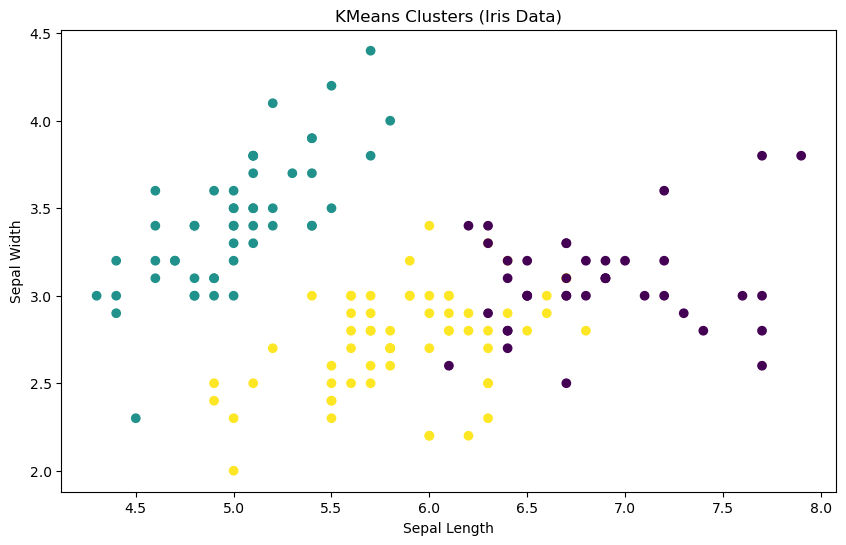

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'], c=df['Labels'])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("KMeans Clusters (Iris Data)")
plt.show()

# **Predicted Pairplot** 

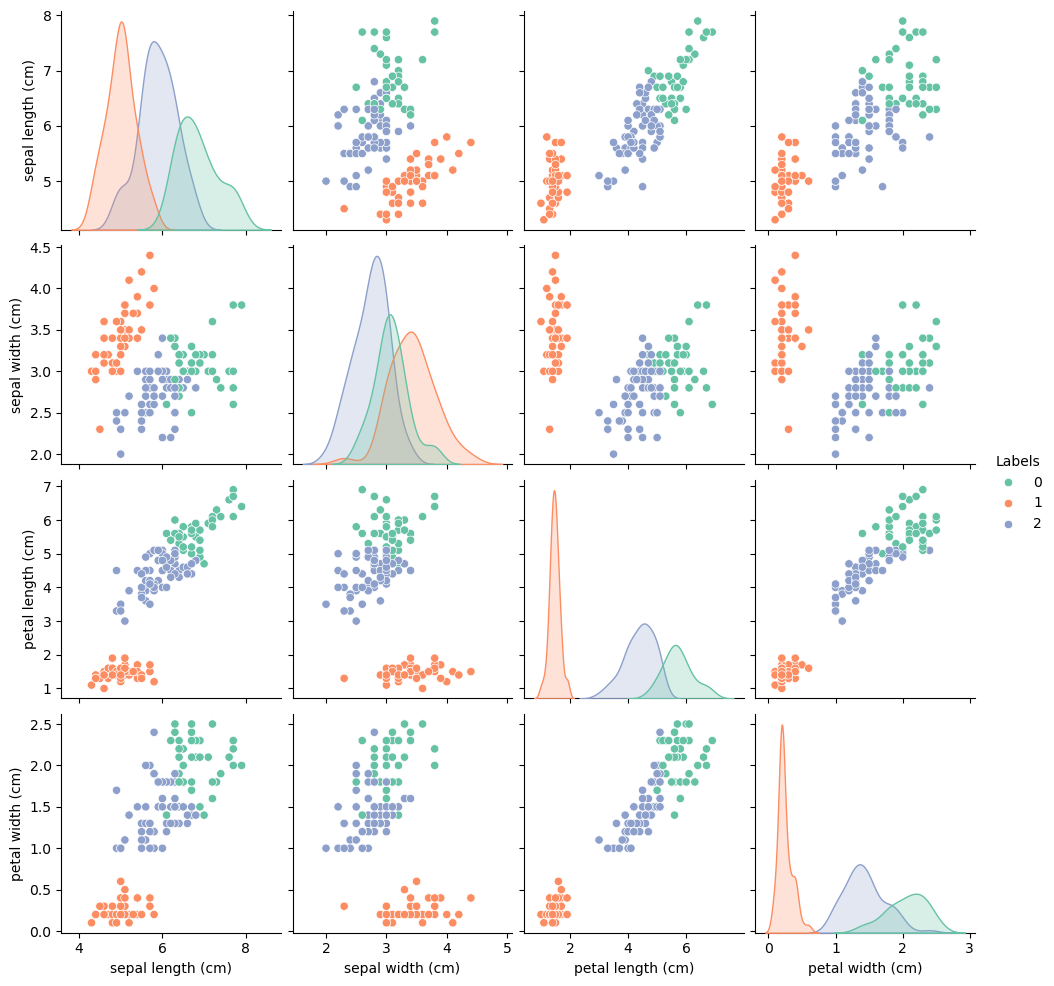

In [53]:
copy=df.drop('Target', axis=1)
sns.pairplot(data=copy, hue='Labels', palette='Set2')
plt.show()